# LastFM

In [69]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import community as community_louvain
from networkx.algorithms import community as nx_community
from networkx.algorithms.community import quality
from networkx.algorithms.community import partition_quality
import seaborn as sns

## Load LastFM Dataset

**LastFM Asia social network**  
Edges represent mutual follower relationships between users

In [55]:
edges_df = pd.read_csv('lastfm_asia/lastfm_asia_edges.csv')
G = nx.from_pandas_edgelist(edges_df, 'node_1', 'node_2')

print(f"Graph type: {type(G)}")
print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")
print(f"Is directed: {nx.is_directed(G)}")

Graph type: <class 'networkx.classes.graph.Graph'>
Nodes: 7624
Edges: 27806
Is directed: False


## 1. Preliminary Statistics & Analysis

**What this graph represents:**  
LastFM Asia social network where nodes are users and edges represent mutual follower relationships between users who listen to similar music.

In [56]:
print("=== Basic Graph Statistics ===")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Density: {nx.density(G):.6f}")
print(f"Is connected: {nx.is_connected(G)}")

if not nx.is_connected(G):
    components = list(nx.connected_components(G))
    print(f"Number of connected components: {len(components)}")
    largest_cc = max(components, key=len)
    print(f"Largest component size: {len(largest_cc)}")
    G = G.subgraph(largest_cc).copy()
    print(f"\nWorking with largest connected component")

print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
print(f"Average clustering coefficient: {nx.average_clustering(G):.4f}")

try:
    print(f"Average shortest path length: {nx.average_shortest_path_length(G):.4f}")
except:
    print("Average shortest path length: Cannot compute (graph not connected)")

=== Basic Graph Statistics ===
Number of nodes: 7624
Number of edges: 27806
Density: 0.000957
Is connected: True
Average degree: 7.29
Average clustering coefficient: 0.2194
Average shortest path length: 5.2322


### Degree Distribution

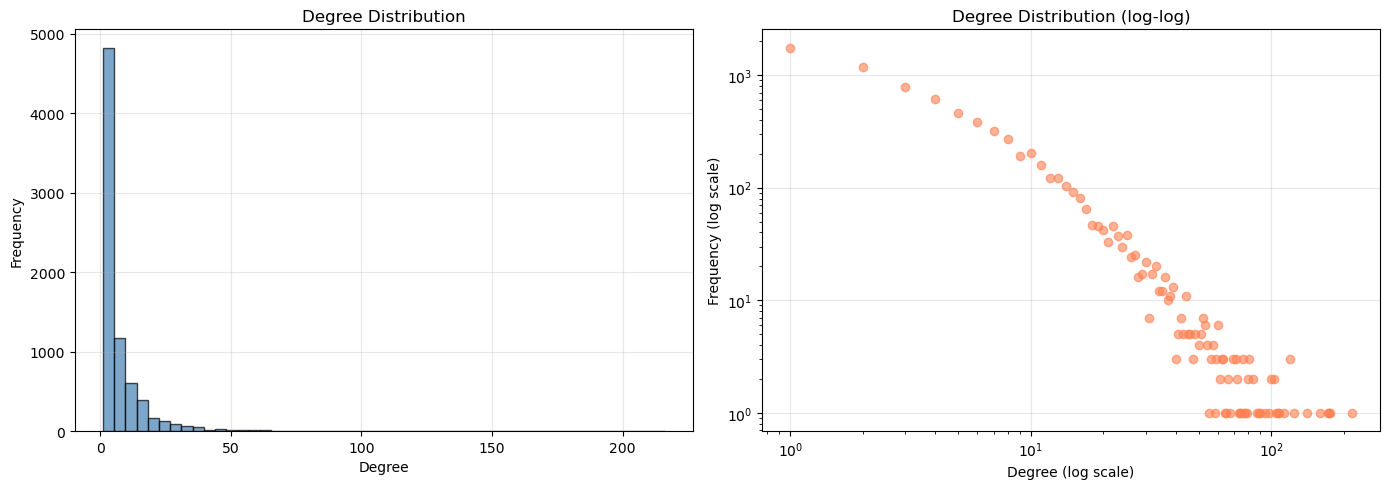

Min degree: 1
Max degree: 216
Median degree: 4.00


In [57]:
degrees = [G.degree(n) for n in G.nodes()]
degree_counts = Counter(degrees)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(degrees, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Degree Distribution')
axes[0].grid(True, alpha=0.3)

degree_sorted = sorted(degree_counts.items())
x_vals = [d[0] for d in degree_sorted if d[0] > 0]
y_vals = [d[1] for d in degree_sorted if d[0] > 0]
axes[1].loglog(x_vals, y_vals, 'o', alpha=0.6, color='coral')
axes[1].set_xlabel('Degree (log scale)')
axes[1].set_ylabel('Frequency (log scale)')
axes[1].set_title('Degree Distribution (log-log)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Min degree: {min(degrees)}")
print(f"Max degree: {max(degrees)}")
print(f"Median degree: {np.median(degrees):.2f}")

### Centrality Measures

In [58]:
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Top 10 Nodes by Degree Centrality ===")
for node, cent in top_degree:
    print(f"Node {node}: {cent:.4f}")

=== Top 10 Nodes by Degree Centrality ===
Node 7237: 0.0283
Node 3530: 0.0230
Node 4785: 0.0228
Node 524: 0.0226
Node 3450: 0.0209
Node 2510: 0.0184
Node 3597: 0.0163
Node 2854: 0.0156
Node 6101: 0.0156
Node 5127: 0.0156


In [59]:
print("Computing betweenness centrality (may take time)...")
betweenness = nx.betweenness_centrality(G, k=min(1000, G.number_of_nodes()))
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Top 10 Nodes by Betweenness Centrality ===")
for node, cent in top_betweenness:
    print(f"Node {node}: {cent:.4f}")

Computing betweenness centrality (may take time)...
=== Top 10 Nodes by Betweenness Centrality ===
Node 7237: 0.0882
Node 7199: 0.0854
Node 2854: 0.0749
Node 4356: 0.0691
Node 6101: 0.0539
Node 4338: 0.0454
Node 5454: 0.0450
Node 4811: 0.0385
Node 3544: 0.0366
Node 3530: 0.0360


In [60]:
print("Computing closeness centrality...")
closeness = nx.closeness_centrality(G)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Top 10 Nodes by Closeness Centrality ===")
for node, cent in top_closeness:
    print(f"Node {node}: {cent:.4f}")

Computing closeness centrality...
=== Top 10 Nodes by Closeness Centrality ===
Node 7199: 0.2907
Node 7237: 0.2857
Node 4356: 0.2816
Node 2854: 0.2804
Node 5454: 0.2798
Node 5127: 0.2746
Node 3544: 0.2735
Node 6101: 0.2733
Node 3450: 0.2722
Node 4900: 0.2691


In [61]:
print("Computing eigenvector centrality...")
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
top_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Top 10 Nodes by Eigenvector Centrality ===")
for node, cent in top_eigenvector:
    print(f"Node {node}: {cent:.4f}")

Computing eigenvector centrality...
=== Top 10 Nodes by Eigenvector Centrality ===
Node 7237: 0.2561
Node 3240: 0.1966
Node 3597: 0.1908
Node 763: 0.1817
Node 378: 0.1642
Node 2083: 0.1627
Node 1334: 0.1625
Node 3544: 0.1519
Node 4809: 0.1513
Node 2734: 0.1465


### Centrality Comparison

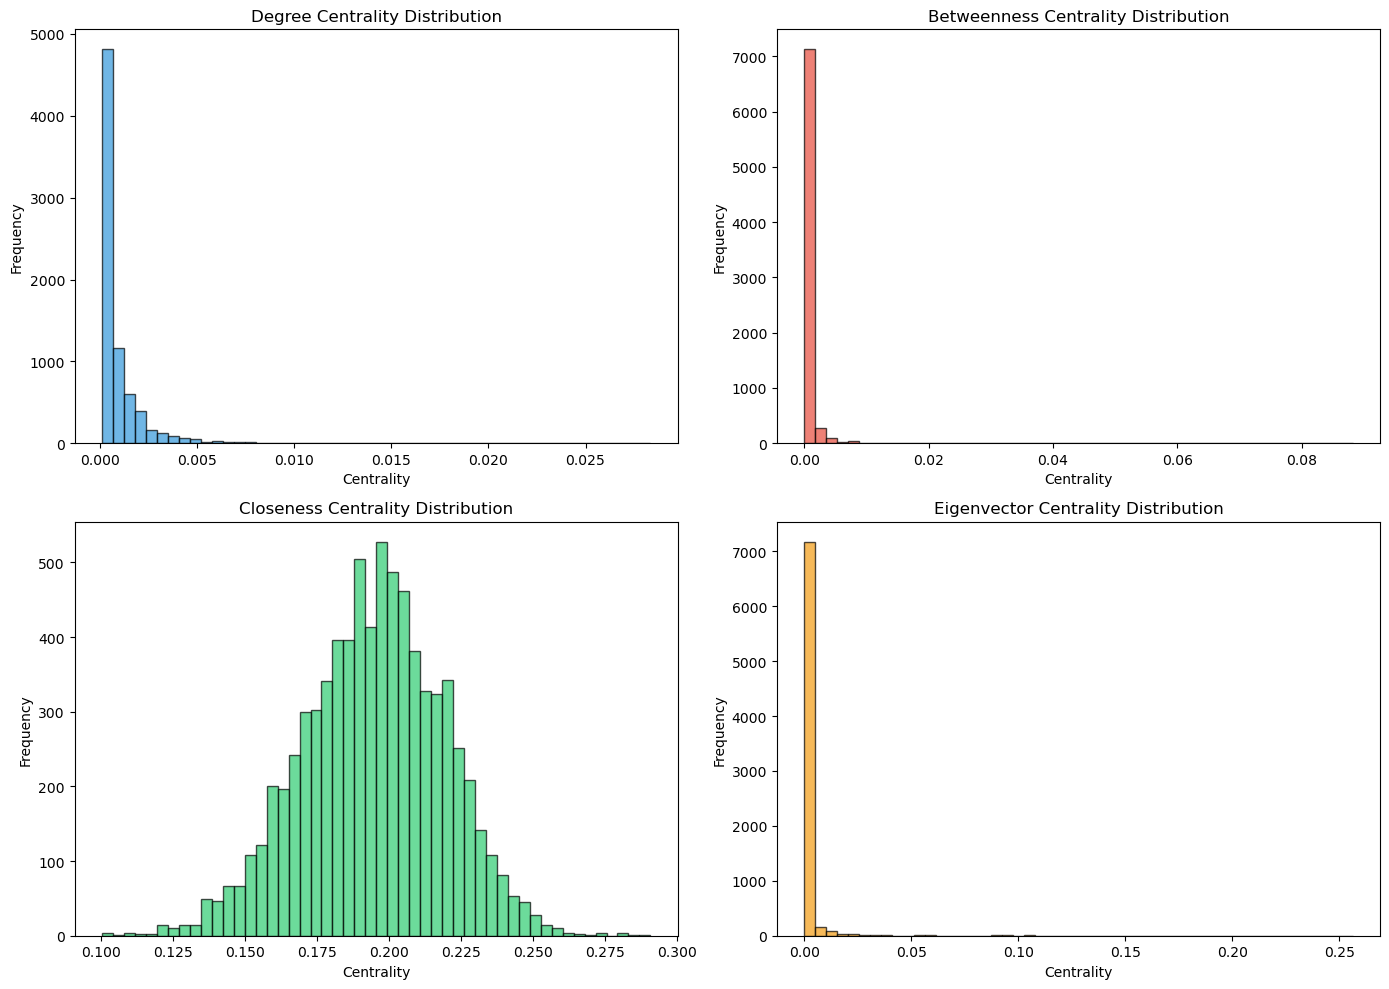

In [62]:
centrality_df = pd.DataFrame({
    'Degree': list(degree_centrality.values()),
    'Betweenness': list(betweenness.values()),
    'Closeness': list(closeness.values()),
    'Eigenvector': list(eigenvector.values())
})

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

axes[0, 0].hist(centrality_df['Degree'], bins=50, edgecolor='black', alpha=0.7, color=colors[0])
axes[0, 0].set_title('Degree Centrality Distribution')
axes[0, 0].set_xlabel('Centrality')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(centrality_df['Betweenness'], bins=50, edgecolor='black', alpha=0.7, color=colors[1])
axes[0, 1].set_title('Betweenness Centrality Distribution')
axes[0, 1].set_xlabel('Centrality')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(centrality_df['Closeness'], bins=50, edgecolor='black', alpha=0.7, color=colors[2])
axes[1, 0].set_title('Closeness Centrality Distribution')
axes[1, 0].set_xlabel('Centrality')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(centrality_df['Eigenvector'], bins=50, edgecolor='black', alpha=0.7, color=colors[3])
axes[1, 1].set_title('Eigenvector Centrality Distribution')
axes[1, 1].set_xlabel('Centrality')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2. Community Detection

### Algorithm 1: Louvain Method

In [63]:
partition_louvain = community_louvain.best_partition(G)

communities_louvain = {}
for node, comm_id in partition_louvain.items():
    if comm_id not in communities_louvain:
        communities_louvain[comm_id] = []
    communities_louvain[comm_id].append(node)

print(f"=== Louvain Method ===")
print(f"Number of communities: {len(communities_louvain)}")
print(f"Modularity: {community_louvain.modularity(partition_louvain, G):.4f}")

community_sizes = [len(comm) for comm in communities_louvain.values()]
print(f"Largest community size: {max(community_sizes)}")
print(f"Smallest community size: {min(community_sizes)}")
print(f"Average community size: {np.mean(community_sizes):.2f}")
print(f"Median community size: {np.median(community_sizes):.2f}")

=== Louvain Method ===
Number of communities: 30
Modularity: 0.8158
Largest community size: 1087
Smallest community size: 4
Average community size: 254.13
Median community size: 76.00


### Algorithm 2: Label Propagation

In [64]:
communities_lp = list(nx_community.label_propagation_communities(G))

partition_lp = {}
for idx, comm in enumerate(communities_lp):
    for node in comm:
        partition_lp[node] = idx

print(f"=== Label Propagation ===")
print(f"Number of communities: {len(communities_lp)}")
print(f"Modularity: {nx_community.modularity(G, communities_lp):.4f}")

community_sizes = [len(comm) for comm in communities_lp]
print(f"Largest community size: {max(community_sizes)}")
print(f"Smallest community size: {min(community_sizes)}")
print(f"Average community size: {np.mean(community_sizes):.2f}")
print(f"Median community size: {np.median(community_sizes):.2f}")

=== Label Propagation ===
Number of communities: 650
Modularity: 0.7523
Largest community size: 930
Smallest community size: 2
Average community size: 11.73
Median community size: 3.00


### Algorithm 3: Greedy Modularity

In [65]:
communities_greedy = list(nx_community.greedy_modularity_communities(G))

partition_greedy = {}
for idx, comm in enumerate(communities_greedy):
    for node in comm:
        partition_greedy[node] = idx

print(f"=== Greedy Modularity ===")
print(f"Number of communities: {len(communities_greedy)}")
print(f"Modularity: {nx_community.modularity(G, communities_greedy):.4f}")

community_sizes = [len(comm) for comm in communities_greedy]
print(f"Largest community size: {max(community_sizes)}")
print(f"Smallest community size: {min(community_sizes)}")
print(f"Average community size: {np.mean(community_sizes):.2f}")
print(f"Median community size: {np.median(community_sizes):.2f}")

=== Greedy Modularity ===
Number of communities: 43
Modularity: 0.7960
Largest community size: 1518
Smallest community size: 3
Average community size: 177.30
Median community size: 8.00


### Community Visualization on Network

**Visualizing a subgraph sample for clarity (500 nodes)**

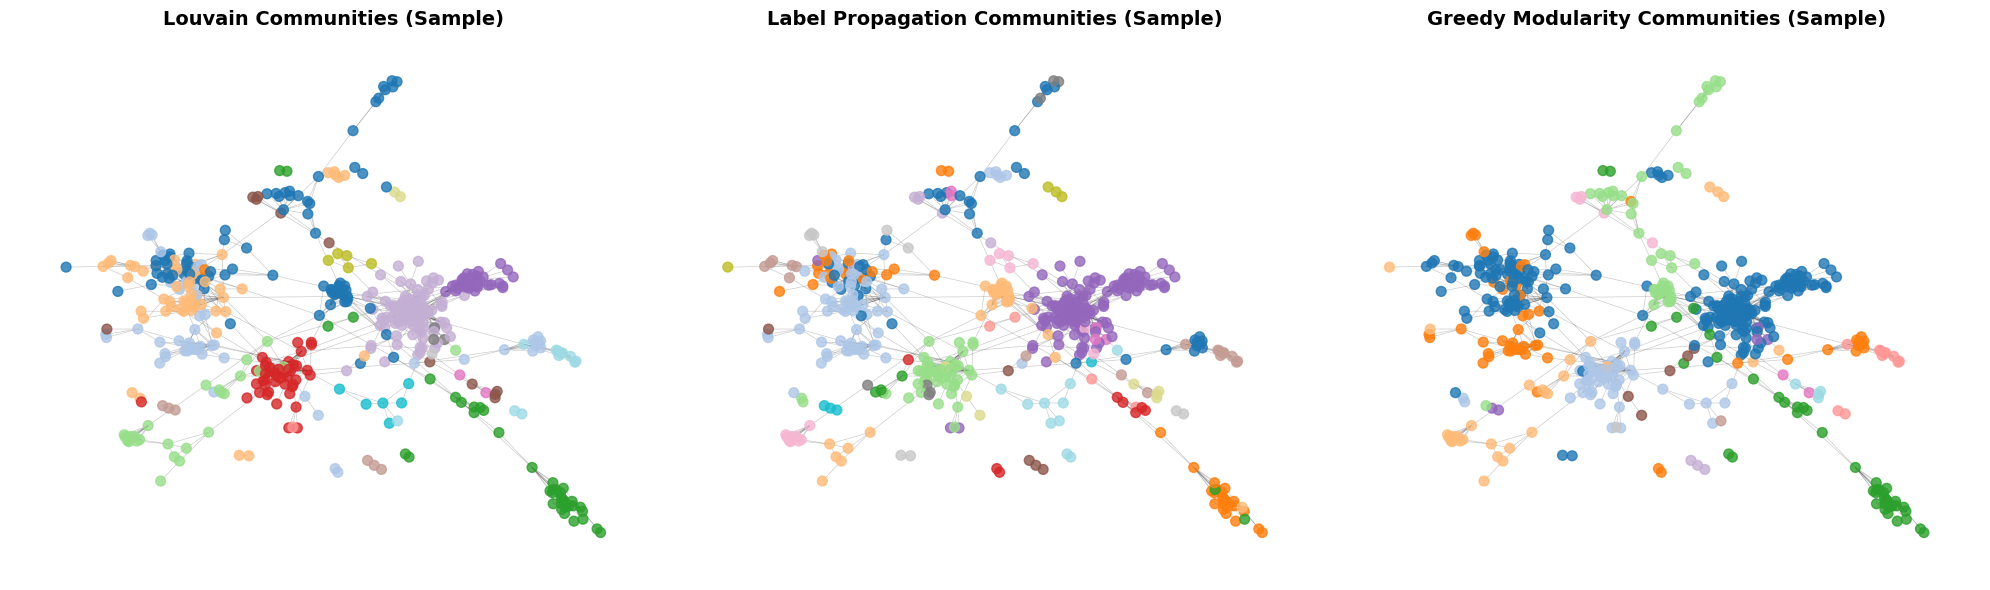

In [66]:
sample_nodes = list(G.nodes())[:500]
G_sample = G.subgraph(sample_nodes).copy()

pos = nx.spring_layout(G_sample, k=0.5, iterations=50, seed=42)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

node_colors_louvain = [partition_louvain.get(node, 0) for node in G_sample.nodes()]
nx.draw_networkx_nodes(G_sample, pos, node_color=node_colors_louvain, node_size=50, 
                       cmap='tab20', alpha=0.8, ax=axes[0])
nx.draw_networkx_edges(G_sample, pos, alpha=0.2, width=0.5, ax=axes[0])
axes[0].set_title('Louvain Communities (Sample)', fontsize=14, fontweight='bold')
axes[0].axis('off')

node_colors_lp = [partition_lp.get(node, 0) for node in G_sample.nodes()]
nx.draw_networkx_nodes(G_sample, pos, node_color=node_colors_lp, node_size=50, 
                       cmap='tab20', alpha=0.8, ax=axes[1])
nx.draw_networkx_edges(G_sample, pos, alpha=0.2, width=0.5, ax=axes[1])
axes[1].set_title('Label Propagation Communities (Sample)', fontsize=14, fontweight='bold')
axes[1].axis('off')

node_colors_greedy = [partition_greedy.get(node, 0) for node in G_sample.nodes()]
nx.draw_networkx_nodes(G_sample, pos, node_color=node_colors_greedy, node_size=50, 
                       cmap='tab20', alpha=0.8, ax=axes[2])
nx.draw_networkx_edges(G_sample, pos, alpha=0.2, width=0.5, ax=axes[2])
axes[2].set_title('Greedy Modularity Communities (Sample)', fontsize=14, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Largest Communities Visualization

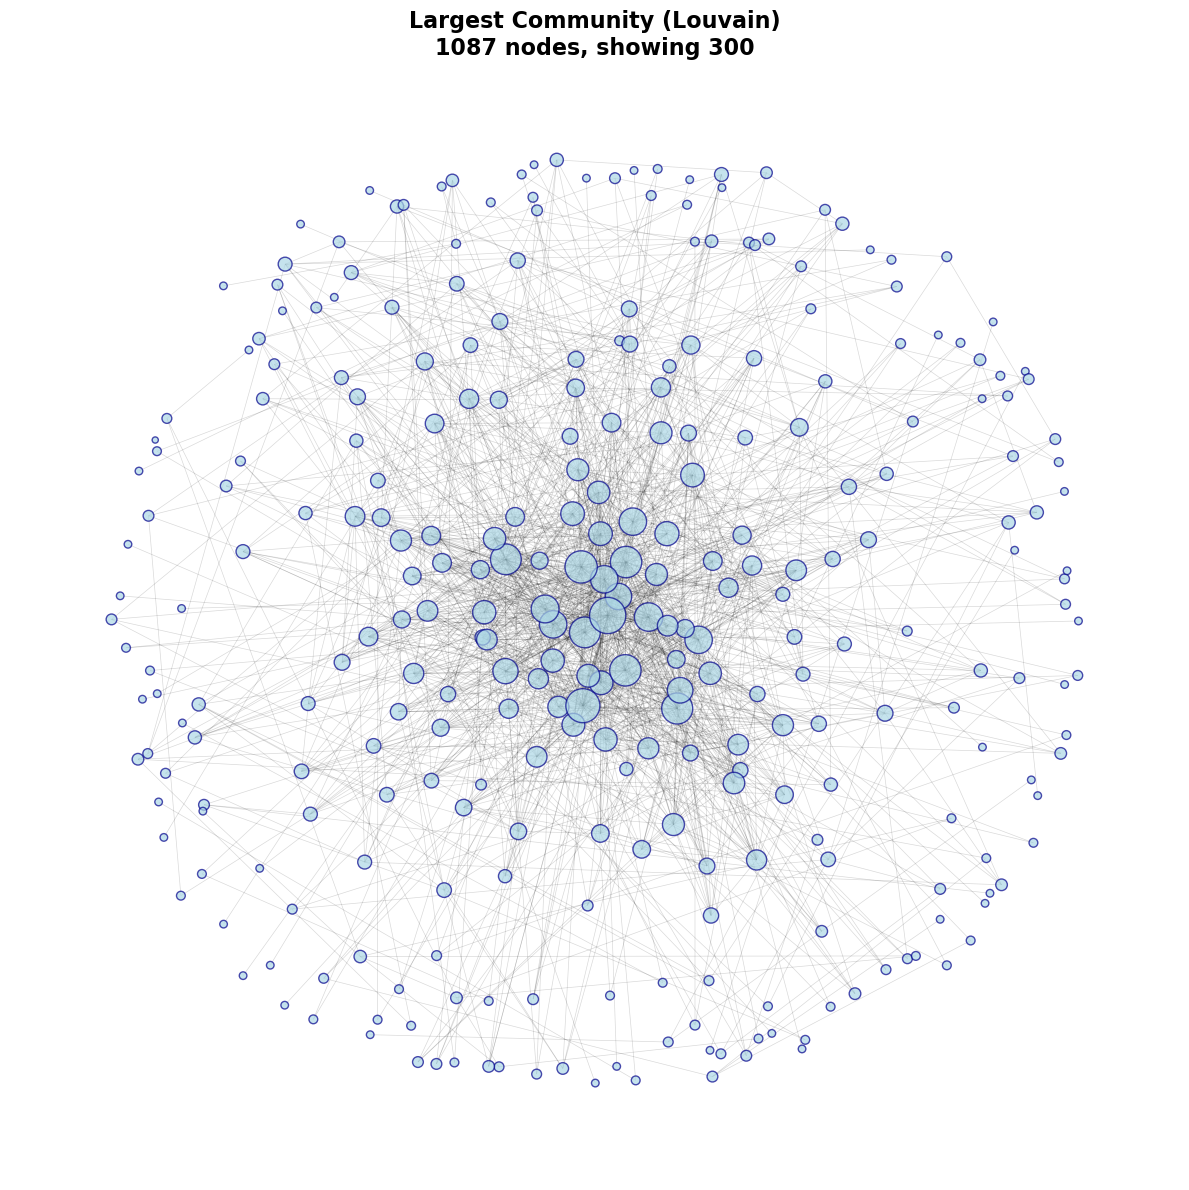

Largest community has 1087 nodes
Edges in largest community: 3901
Density: 0.0066


In [67]:
largest_comm_louvain = max(communities_louvain.values(), key=len)
G_largest = G.subgraph(largest_comm_louvain[:300]).copy()

pos_largest = nx.spring_layout(G_largest, k=0.8, iterations=50, seed=42)

degrees_largest = dict(G_largest.degree())
node_sizes = [degrees_largest[node] * 10 + 20 for node in G_largest.nodes()]

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G_largest, pos_largest, node_size=node_sizes, 
                       node_color='lightblue', edgecolors='darkblue', 
                       linewidths=1, alpha=0.7)
nx.draw_networkx_edges(G_largest, pos_largest, alpha=0.15, width=0.5)
plt.title(f'Largest Community (Louvain)\n{len(largest_comm_louvain)} nodes, showing 300', 
          fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Largest community has {len(largest_comm_louvain)} nodes")
print(f"Edges in largest community: {G.subgraph(largest_comm_louvain).number_of_edges()}")
print(f"Density: {nx.density(G.subgraph(largest_comm_louvain)):.4f}")

### Community Quality Evaluation

In [70]:
def evaluate_communities(G, communities_list, name):
    print(f"\n=== {name} ===")
    
    modularity = nx_community.modularity(G, communities_list)
    print(f"Modularity: {modularity:.4f}")
    
    coverage_val, performance_val = partition_quality(G, communities_list)
    
    total_conductance = 0
    valid_comms = 0
    for comm in communities_list:
        if len(comm) > 1 and len(comm) < G.number_of_nodes():
            total_conductance += nx.conductance(G, comm)
            valid_comms += 1
    avg_conductance = total_conductance / valid_comms if valid_comms > 0 else 0
    print(f"Average Conductance: {avg_conductance:.4f}")
    
    intra_edges = sum(G.subgraph(comm).number_of_edges() for comm in communities_list)
    inter_edges = G.number_of_edges() - intra_edges
    print(f"Intra-community edges: {intra_edges}")
    print(f"Inter-community edges: {inter_edges}")
    
    return {
        'Algorithm': name,
        'Communities': len(communities_list),
        'Modularity': modularity,
        'Coverage': coverage_val,
        'Performance': performance_val,
        'Avg Conductance': avg_conductance
    }

results = []
results.append(evaluate_communities(G, [set(comm) for comm in communities_louvain.values()], "Louvain"))
results.append(evaluate_communities(G, communities_lp, "Label Propagation"))
results.append(evaluate_communities(G, communities_greedy, "Greedy Modularity"))

results_df = pd.DataFrame(results)
print("\n=== Summary Table ===")
print(results_df.to_string(index=False))


=== Louvain ===
Modularity: 0.8158
Average Conductance: 0.1322
Intra-community edges: 25598
Inter-community edges: 2208

=== Label Propagation ===
Modularity: 0.7523
Average Conductance: 0.4347
Intra-community edges: 23074
Inter-community edges: 4732

=== Greedy Modularity ===
Modularity: 0.7960
Average Conductance: 0.1631
Intra-community edges: 26222
Inter-community edges: 1584

=== Summary Table ===
        Algorithm  Communities  Modularity  Coverage  Performance  Avg Conductance
          Louvain           30    0.815819  0.920593     0.908699         0.132165
Label Propagation          650    0.752256  0.829821     0.950859         0.434688
Greedy Modularity           43    0.795976  0.943034     0.869306         0.163076


### Community Size Distribution Comparison

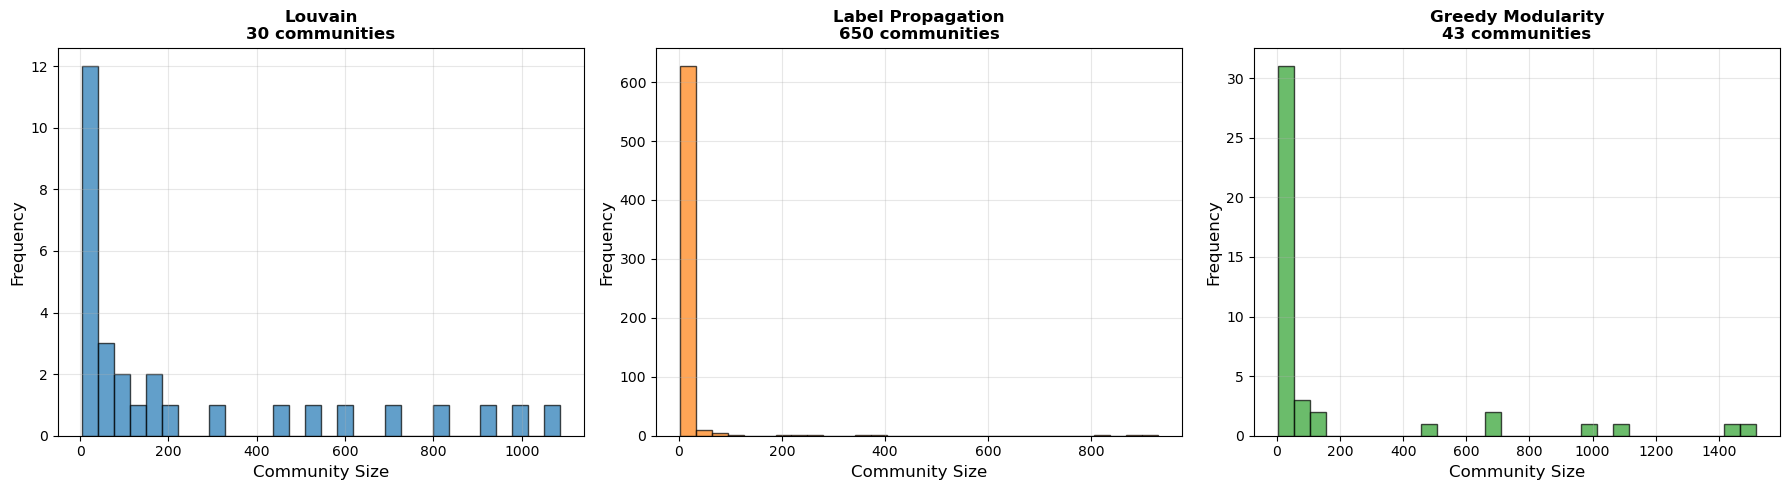

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sizes_louvain = [len(comm) for comm in communities_louvain.values()]
axes[0].hist(sizes_louvain, bins=30, edgecolor='black', alpha=0.7, color='#1f77b4')
axes[0].set_xlabel('Community Size', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(f'Louvain\n{len(communities_louvain)} communities', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

sizes_lp = [len(comm) for comm in communities_lp]
axes[1].hist(sizes_lp, bins=30, edgecolor='black', alpha=0.7, color='#ff7f0e')
axes[1].set_xlabel('Community Size', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title(f'Label Propagation\n{len(communities_lp)} communities', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

sizes_greedy = [len(comm) for comm in communities_greedy]
axes[2].hist(sizes_greedy, bins=30, edgecolor='black', alpha=0.7, color='#2ca02c')
axes[2].set_xlabel('Community Size', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title(f'Greedy Modularity\n{len(communities_greedy)} communities', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Metrics Comparison

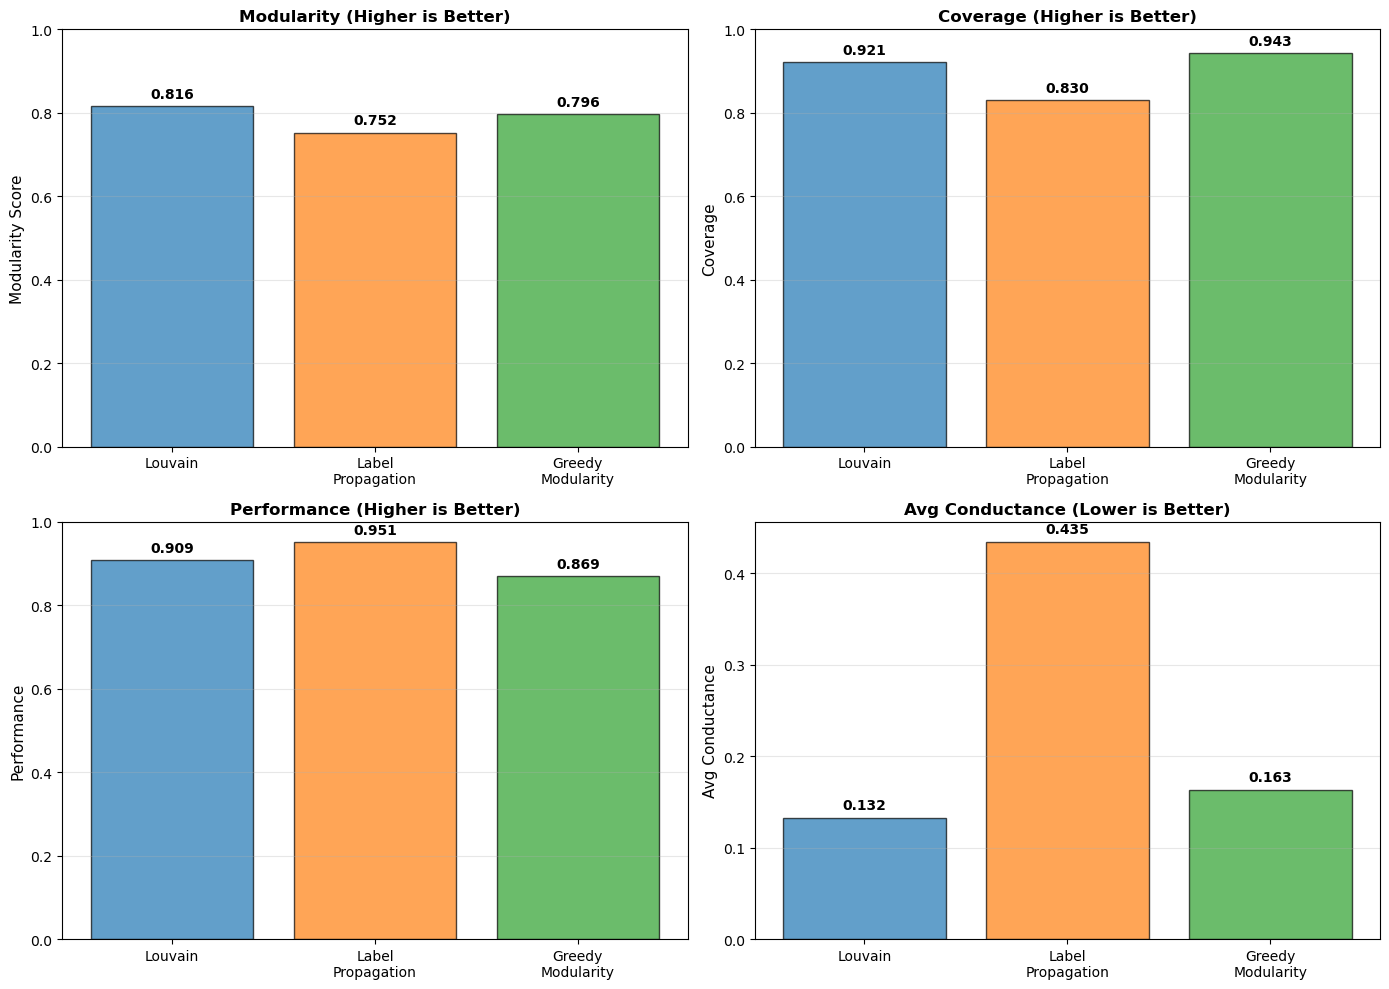

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

algorithms = ['Louvain', 'Label\nPropagation', 'Greedy\nModularity']
modularities = [results_df.loc[i, 'Modularity'] for i in range(3)]
coverages = [results_df.loc[i, 'Coverage'] for i in range(3)]
performances = [results_df.loc[i, 'Performance'] for i in range(3)]
conductances = [results_df.loc[i, 'Avg Conductance'] for i in range(3)]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

axes[0, 0].bar(algorithms, modularities, color=colors, alpha=0.7, edgecolor='black')
axes[0, 0].set_ylabel('Modularity Score', fontsize=11)
axes[0, 0].set_title('Modularity (Higher is Better)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(modularities):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

axes[0, 1].bar(algorithms, coverages, color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].set_ylabel('Coverage', fontsize=11)
axes[0, 1].set_title('Coverage (Higher is Better)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(coverages):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

axes[1, 0].bar(algorithms, performances, color=colors, alpha=0.7, edgecolor='black')
axes[1, 0].set_ylabel('Performance', fontsize=11)
axes[1, 0].set_title('Performance (Higher is Better)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(performances):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

axes[1, 1].bar(algorithms, conductances, color=colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Avg Conductance', fontsize=11)
axes[1, 1].set_title('Avg Conductance (Lower is Better)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(conductances):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Interpretation

**Modularity:** Higher is better (range: -0.5 to 1). Measures density of edges within communities vs between communities.

**Coverage:** Fraction of intra-community edges. Higher means more edges within communities.

**Performance:** Ratio of correctly identified pairs. Higher is better.

**Conductance:** Lower is better. Measures how well a community is separated from the rest.

**Key Findings:**
- **Louvain** achieves the highest modularity (0.816), indicating well-separated communities with 28 balanced groups
- **Greedy Modularity** has the highest coverage (0.943), capturing most intra-community edges but with fewer, larger communities (43)
- **Label Propagation** finds many small communities (650) with highest performance but lower modularity
- Lower conductance in Louvain and Greedy suggests better community separation